# Advertisement Success Prediction

This is a binary classification problem where you need to predict whether an ad buy will lead to a netgain.

#### Data Description
 - ***train.csv:*** It contains the training data with advertisement details.
 
 - ***test.csv:*** It has advertisement details for which the participants are to submit whether netgain would be there

 - ***Evaluation Metric***: Submissions are evaluated using [F1_Score(Binary)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

## 1. Import the packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample, shuffle

import warnings
warnings.filterwarnings("ignore")

## 2. Read the data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserID                             19536 non-null  object 
 1   realtionship_status                19536 non-null  object 
 2   industry                           19536 non-null  object 
 3   genre                              19536 non-null  object 
 4   targeted_sex                       19536 non-null  object 
 5   average_runtime(minutes_per_week)  19536 non-null  int64  
 6   airtime                            19536 non-null  object 
 7   airlocation                        19536 non-null  object 
 8   ratings                            19536 non-null  float64
 9   expensive                          19536 non-null  object 
 10  money_back_guarantee               19536 non-null  object 
 11  netgain                            19536 non-null  int

In [4]:
df.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

We can clearly see that none of the features have any missing values!

In [5]:
df_copy = df.copy()
df_copy.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


## 3. Exploratory Data Analysis (EDA)

The following tasks carried out in this section:

 1. Univariate analysis of numerical features
 2. Bivariate analysis of categorical features

### 3.1 Numerical features

In [6]:
df.describe()

,average_runtime(minutes_per_week),ratings,netgain
count,19536.000000,19536.000000,19536.000000
mean,40.375665,0.038826,0.238022
std,12.483166,0.075971,0.425884
min,1.000000,0.000000,0.000000
25%,40.000000,0.027465,0.000000
50%,40.000000,0.027465,0.000000
75%,45.000000,0.027465,0.000000
max,99.000000,1.000000,1.000000


#### Univariate analysis

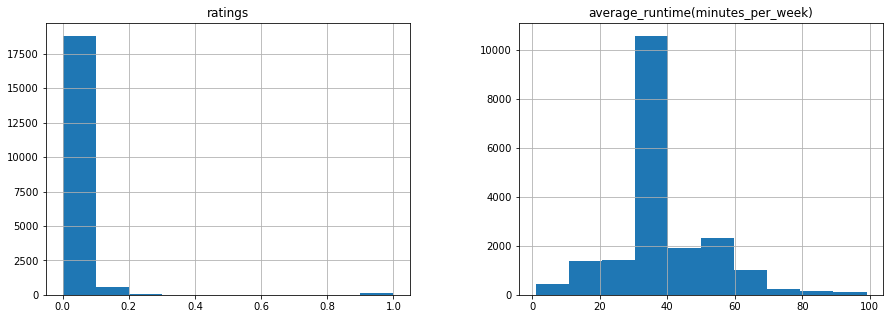

In [7]:
df[['ratings', 'average_runtime(minutes_per_week)']].hist(figsize=(15,5))
plt.show()

**Insights:**

 1. The distribution of ***ratings*** is heavily right-skewed distribution. However, if we look at the quartiles, we clearly see the 25th, 50th and 75th percentile have the same values. Further observation says that ***0.027465*** have most repetative values in the data, hence transformation of this feature doesn't help much. We will keep this as it is.
 2. The distribution of ***average_runtime(minutes_per_week)*** is more or less normally distributed.

In [8]:
df['ratings'].value_counts()

0.027465    17800
0.173580      235
0.102234      170
0.098441      149
1.000000      107
            ...  
0.089319        1
0.041615        1
0.105054        1
0.086761        1
0.031365        1
Name: ratings, Length: 120, dtype: int64

#### Correlation amongst numerical variables

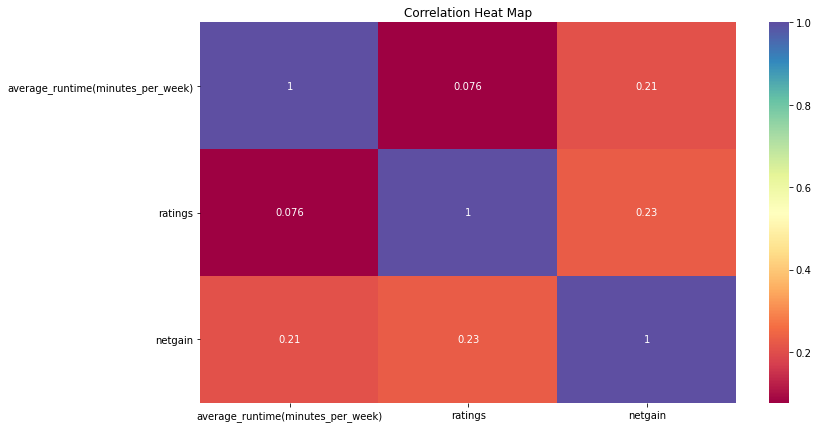

In [9]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_copy.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Heat Map')
plt.show()

Here, average runtime and ratings are positively correlated with netgain.

### 3.2 Categorical features

#### Bivariate analysis

In [10]:
cat_df = df.select_dtypes(exclude=np.number).drop(['UserID', 'airlocation', 'money_back_guarantee'], axis=1)
cat_df.head()

,realtionship_status,industry,genre,targeted_sex,airtime,expensive
0,Married-civ-spouse,Pharma,Comedy,Male,Daytime,Medium
1,Never-married,Political,Comedy,Male,Morning,Low
2,Never-married,Auto,Comedy,Male,Morning,Low
3,Married-civ-spouse,Pharma,Infomercial,Male,Primetime,Low
4,Married-civ-spouse,Other,Comedy,Female,Primetime,Low


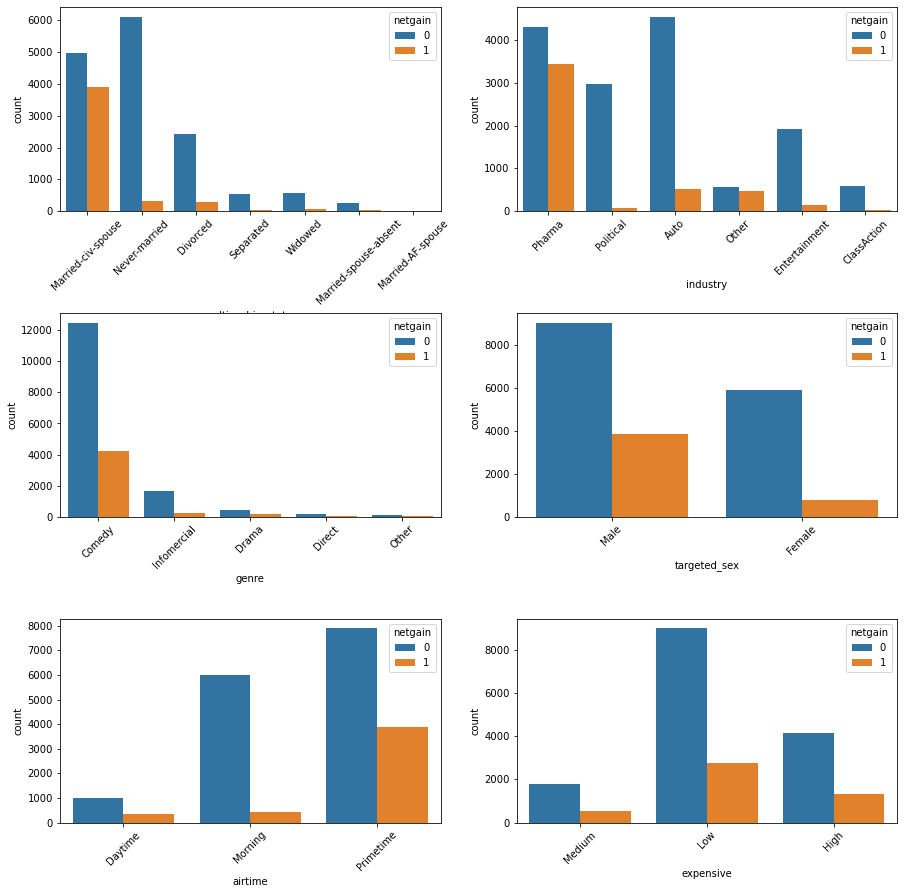

In [11]:
# Setting up subplots
fig, axs = plt.subplots(3,2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
axs = axs.ravel()

for i, icol in enumerate(cat_df.columns):
    sns.countplot(x=icol, data=df, hue='netgain', ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=45)

plt.show()

**Insights:**

 1. **relationship_status:** It is clear from the above bar graph that married audience lead to higher net gain compare to others.
 2. **industry:** It seems Pharma industry has highest net gain when ad is sold.
 3. **genre:** Comedy genre leads to higher net gain when ad is sold compare to other genre.
 4. **targeted_sex:** It seems that if the targeted sex is male, it will lead to higher gain compare to female.
 5. **airtime:** It is clear from the bar graph that primetime will lead to highest gain when ad is sold.
 6. **expensive:** Less expensive ads will lead to highest gain when it is sold.

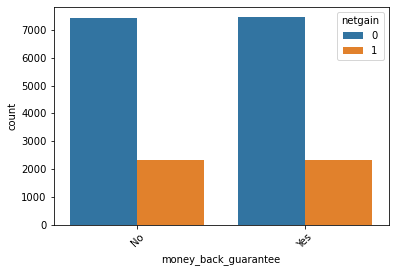

In [12]:
sns.countplot(x='money_back_guarantee', data=df, hue='netgain')
plt.tick_params(axis='x', labelrotation=45)
plt.show()

**Insights:**

 - It seems money back guarantee doesn't lead to overall net gain when ad is sold.

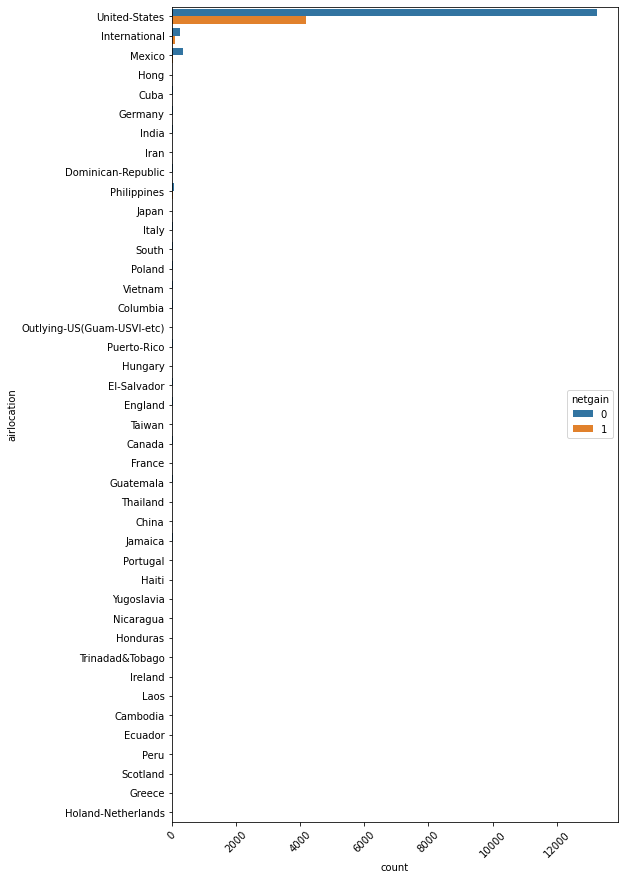

In [13]:
plt.figure(figsize=(8,15))
sns.countplot(y='airlocation', data=df, hue='netgain')
plt.tick_params(axis='x', labelrotation=45)
plt.show() 

**Insights:**

 - It seems US is the potential country that leads to higher net gain when ad is sold.
 - Also it does not much related to netgain overall, hence we can also remove it.

## 4. Encoding features

Here, following techniques are used to encode the categorical features:

 - **Label Encoding** used to encode ordinal feature _expensive_ and two nominal features _targeted_sex_ and _money_back_guarantee_.
 - **Dummy Encoding** used to encode nominal features like _airtime_, _realtionship_status_, _genre_, and _industry_.
 - **Binary Encoding** used to encode few nominal features such as _airlocation_. The reason why it is used because of these features have multiple categories. One-hot encoding or dummy encoding is not an optimum choice when we have multiple categorical features having multiple categories. The binary encoding works really well in case of a high number of categories.

In [14]:
def encode_categories(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function encodes all the categorical variables.
    
    Args:
        df (pd.DataFrame): A pandas dataframe
        
    Returns:
        df (pd.DataFrame): An encoded dataframe
    """
    # Ordinal category encoding
    df['expensive'].replace(to_replace=['Low', 'Medium', 'High'], value=[1, 2, 3], inplace=True)
    
    # Nominal category encoding
    df['targeted_sex'].replace(to_replace=['Female', 'Male'], value=[0, 1], inplace=True)
    df['money_back_guarantee'].replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)
    
    # Dummy encoding the data
    df = pd.get_dummies(data=df, columns=['airtime', 'realtionship_status', 'genre', 'industry'], drop_first=True)
    
    # Binary encoding
    # encoder= ce.BinaryEncoder(cols=['airlocation'], return_df=True)
    # df = encoder.fit_transform(df) 
    
    return df

In [15]:
df = encode_categories(df)
df.head()

,UserID,targeted_sex,average_runtime(minutes_per_week),airlocation,ratings,expensive,money_back_guarantee,netgain,airtime_Morning,airtime_Primetime,...,realtionship_status_Widowed,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political
0,UI_9185,1,40,United-States,0.027465,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,UI_449,1,35,International,0.027465,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,UI_9014,1,40,United-States,0.027465,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,UI_14987,1,40,United-States,0.027465,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,UI_25532,0,50,United-States,0.027465,1,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0


#### Correlation of features with netgain

In [16]:
corr_matrix = df.corr()
corr_matrix['netgain'].sort_values(ascending=False)

netgain                                      1.000000
realtionship_status_Married-civ-spouse       0.431971
industry_Pharma                              0.391980
airtime_Primetime                            0.262476
ratings                                      0.230971
average_runtime(minutes_per_week)            0.208079
targeted_sex                                 0.199733
industry_Other                               0.114828
realtionship_status_Married-AF-spouse        0.009209
expensive                                    0.006853
genre_Drama                                  0.005058
money_back_guarantee                         0.001500
genre_Other                                 -0.019510
genre_Direct                                -0.021378
realtionship_status_Married-spouse-absent   -0.038041
realtionship_status_Widowed                 -0.065082
realtionship_status_Separated               -0.066522
industry_ClassAction                        -0.078814
genre_Infomercial           

## 5. Handle class imbalance

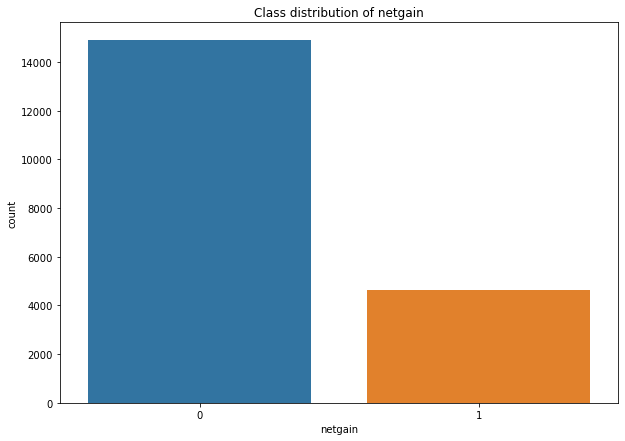

In [17]:
#df['netgain'].value_counts().plot.bar()
plt.figure(figsize=(10, 7))
plt.title('Class distribution of netgain')
sns.countplot(df.netgain)
plt.show()

It is clear that ***netgain*** has imbalance between two classes. Class 1 needs to be upsampled in order to make it equivalent to the class 0.

#### Split the data

Let's drop the **UserID** (as it is just an unique number) and **airlocation** (not related to netgain). Also, drop the target variable **netgain** from the data.

Another insight could be that most of the value for airlocation is United states which may lead model to be biased. Hence, I think it would be wise move to drop this column.

In [18]:
# X = balanced_df.drop(['UserID', 'airlocation', 'netgain'], axis=1)
# y = balanced_df['netgain']
X = df.drop(['UserID', 'airlocation', 'netgain'], axis=1)
y = df['netgain']

X.shape, y.shape

((19536, 22), (19536,))

Here, **80:20** splitting of training and validation data will lead to higher **f1 score** compare to other splits.

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Here scaling is not required as all the features are in similar scale.

In [20]:
# mean = X_train['average_runtime(minutes_per_week)'].mean()
# std = X_train['average_runtime(minutes_per_week)'].std()

# X_train['average_runtime(minutes_per_week)'] = (X_train['average_runtime(minutes_per_week)'] - mean) / std
# X_val['average_runtime(minutes_per_week)'] = (X_val['average_runtime(minutes_per_week)'] - mean) / std

#### Sythetic Minority Oversampling Technique (SMOTE) to handle class imbalance

In [21]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE

print('Shape of train dataset before applying SMOTE:', X_train.shape)

X_train, y_train = SMOTE().fit_resample(X_train, y_train)

print('Shape of train dataset after applying SMOTE:', X_train.shape)

Shape of train dataset before applying SMOTE: (15628, 22)
Shape of train dataset after applying SMOTE: (23872, 22)


## 6. Build the baseline model

 - Trying following few classifiers and select the best performing model for further tuning and testing.

#### 1. Logistic Regression

In [22]:
# Initialize the logistic regression model
lr = LogisticRegression()

# Fit the data
lr.fit(X_train, y_train)

# Find out the predictions
y_pred = lr.predict(X_val)

# Evaluate the f1 score
print('Training f1 score: ', f1_score(y_train, lr.predict(X_train)))
print('Validation f1 score: ', f1_score(y_val, y_pred))

Training f1 score:  0.7960464386570443
Validation f1 score:  0.6011787819253438


#### 2. Decision Tree

In [23]:
# Initialize the the model
dt = DecisionTreeClassifier()

# Fit the data
dt.fit(X_train, y_train)

# Find out the predictions
y_pred = dt.predict(X_val)

# Evaluate the f1 score
print('Training f1 score: ', f1_score(y_train, dt.predict(X_train)))
print('Validation f1 score: ', f1_score(y_val, y_pred))

Training f1 score:  0.8640164063732451
Validation f1 score:  0.5987730061349693


#### 3. Random Forest

In [24]:
# Initialize the the model
rf = RandomForestClassifier(max_features=10, n_estimators=24, random_state=42)

# Fit the data
rf.fit(X_train, y_train)

# Find out the predictions
y_pred = rf.predict(X_val)

# Evaluate the f1 score
print('Training f1 score: ', f1_score(y_train, rf.predict(X_train)))
print('Validation f1 score: ', f1_score(y_val, y_pred))

Training f1 score:  0.8645519615128878
Validation f1 score:  0.6006493506493507


#### 4. XGBoost

In [27]:
# Initialize the the model
xgb1 = XGBClassifier(objective='binary:logistic')

# Fit the data
xgb1.fit(X_train, y_train)

# Find out the predictions
y_pred = xgb1.predict(X_val)

# Evaluate the f1 score
print('Training f1 score: ', f1_score(y_train, xgb1.predict(X_train)))
print('Validation f1 score: ', f1_score(y_val, y_pred))

Training f1 score:  0.8451899128268991
Validation f1 score:  0.6145833333333334


#### 5. Support Vector Classifier

In [28]:
# Initialize the the model
svc = SVC(verbose=True, random_state=42)

# Fit the data
svc.fit(X_train, y_train)

# Find out the predictions
y_pred = svc.predict(X_val)

# Evaluate the f1 score
print('Training f1 score: ', f1_score(y_train, svc.predict(X_train)))
print('Validation f1 score: ', f1_score(y_val, y_pred))

[LibSVM]Training f1 score:  0.7736369910282953
Validation f1 score:  0.5794256633951289


#### 6. Linear Support Vector Classifier

In [29]:
# Initialize the the model
lsvc = LinearSVC(verbose=True)

# Fit the data
lsvc.fit(X_train, y_train)

# Find out the predictions
y_pred = lsvc.predict(X_val)

# Evaluate the f1 score
print('Training f1 score: ', f1_score(y_train, lsvc.predict(X_train)))
print('Validation f1 score: ', f1_score(y_val, y_pred))

[LibLinear]Training f1 score:  0.7926090675791274
Validation f1 score:  0.5526315789473685


#### 7. K-nearest Neighbors

In [30]:
# Initialize the the model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the data
knn.fit(X_train, y_train)

# Find out the predictions
y_pred = knn.predict(X_val)

# Evaluate the f1 score
print('Training f1 score: ', f1_score(y_train, knn.predict(X_train)))
print('Validation f1 score: ', f1_score(y_val, y_pred))

print(f'accuracy of train set: {knn.score(X_train, y_train)}')
print(f'accuracy of test set: {knn.score(X_val, y_val)}')

Training f1 score:  0.7283593416496704
Validation f1 score:  0.5270833333333333
accuracy of train set: 0.760095509383378
accuracy of test set: 0.7676560900716479


#### 8. Stochastic Gradient Descent (SGD) Classifier

In [31]:
# Initialize the the model
sgd = SGDClassifier()

# Fit the data
sgd.fit(X_train, y_train)

# Find out the predictions
y_pred = sgd.predict(X_val)

# Evaluate the f1 score
print('Training f1 score: ', f1_score(y_train, sgd.predict(X_train)))
print('Validation f1 score: ', f1_score(y_val, y_pred))

Training f1 score:  0.755138029433454
Validation f1 score:  0.4990639208344477


#### Best performing model

 - Here, we can see that XGBoost classifier outperforms all other models. Hence, let's tune it to improve **f1 score** further.

### 7.1 Hyperparameter tuning for best performing Classifier

In [33]:
# Initialize the the model
xgb = XGBClassifier(learning_rate=0.01,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=10, 
                      gamma=5)

# Fit the data
xgb.fit(X_train, y_train)

# Find out the predictions
y_pred = xgb.predict(X_val)

# Evaluate the f1 score
print('Training f1 score: ', f1_score(y_train, xgb.predict(X_train)))
print('Validation f1 score: ', f1_score(y_val, y_pred))

Training f1 score:  0.8302605989887203
Validation f1 score:  0.6171564733915805


## 8. Test and create submission file

Baseline logistic regression model gives f1 score of 0.60

In [34]:
df_test = pd.read_csv('test.csv')
df_test.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


In [35]:
df_test = encode_categories(df_test)
df_test.head()

,UserID,targeted_sex,average_runtime(minutes_per_week),airlocation,ratings,expensive,money_back_guarantee,airtime_Morning,airtime_Primetime,realtionship_status_Married-AF-spouse,...,realtionship_status_Widowed,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political
0,UI_8772,0,40,United-States,0.027465,3,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,UI_13139,0,40,United-States,0.027465,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,UI_15381,1,40,United-States,0.027465,3,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,UI_15503,1,30,United-States,0.027465,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,UI_16556,1,70,United-States,0.027465,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df_test.drop(['UserID', 'airlocation'], axis=1, inplace=True)

In [37]:
y_pred = xgb.predict(df_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

<AxesSubplot:xlabel='netgain'>

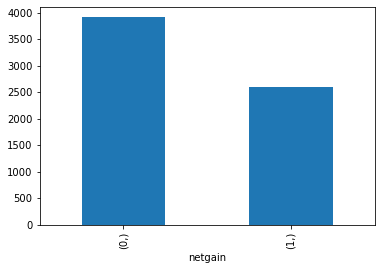

In [38]:
Predicted_Y = pd.DataFrame(y_pred)
Predicted_Y.columns = ['netgain']

Predicted_Y.value_counts().plot.bar()
#Predicted_Y.head()

In [39]:
# Write Final preds
Predicted_Y.to_csv("./submission.csv", index=False)